<a href="https://colab.research.google.com/github/Mey1921/Analyzing-the-Impact-of-Recession-on-Automobile-Sales/blob/main/Analyzing_the_Impact_of_Recession_on_Automobile_Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%pip install dash dash-html-components dash-core-components plotly

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import datetime as dt
import dash
from dash import html, dcc
from dash.dependencies import Input, Output, State
import plotly.graph_objects as go
import plotly.express as px
from dash import no_update

In [ ]:
import requests
import io
import pandas as pd

URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/historical_automobile_sales.csv"

try:
    resp = requests.get(URL)
    resp.raise_for_status()  # Raise an exception for bad status codes (4xx or 5xx)
    text = io.BytesIO(resp.content)
    df = pd.read_csv(text)
    print('Data read into a pandas dataframe!')
except requests.exceptions.RequestException as e:
    print(f"Error fetching data: {e}")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

Data read into a pandas dataframe!


In [ ]:
df.describe()

,Year,Recession,Consumer_Confidence,Seasonality_Weight,Price,Advertising_Expenditure,Competition,GDP,Growth_Rate,unemployment_rate,Automobile_Sales
count,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000
mean,2001.500000,0.214015,101.140170,0.575795,24964.991956,3067.456439,6.064394,40.073903,-0.242001,2.453977,2352.718068
std,12.710467,0.410526,10.601154,0.454477,4888.073433,1139.564637,1.968350,16.249714,0.861268,1.119019,1645.321284
min,1980.000000,0.000000,73.900000,0.000000,8793.663000,1009.000000,3.000000,12.508000,-4.227601,1.000000,102.000000
25%,1990.750000,0.000000,94.035000,0.250000,21453.300500,2083.500000,4.000000,27.237500,-0.574049,1.600000,793.950000
50%,2001.500000,0.000000,100.740000,0.500000,25038.691500,3072.000000,6.000000,39.214500,-0.013162,2.300000,2182.600000
75%,2012.250000,0.000000,108.240000,0.750000,28131.684750,4067.250000,8.000000,53.506500,0.388932,2.900000,3614.800000
max,2023.000000,1.000000,131.670000,1.500000,44263.657000,4983.000000,9.000000,70.374000,0.815074,6.000000,21147.000000


In [ ]:
df.columns

Index(['Date', 'Year', 'Month', 'Recession', 'Consumer_Confidence',
       'Seasonality_Weight', 'Price', 'Advertising_Expenditure', 'Competition',
       'GDP', 'Growth_Rate', 'unemployment_rate', 'Automobile_Sales',
       'Vehicle_Type', 'City'],
      dtype='object')

# ***Visualization***

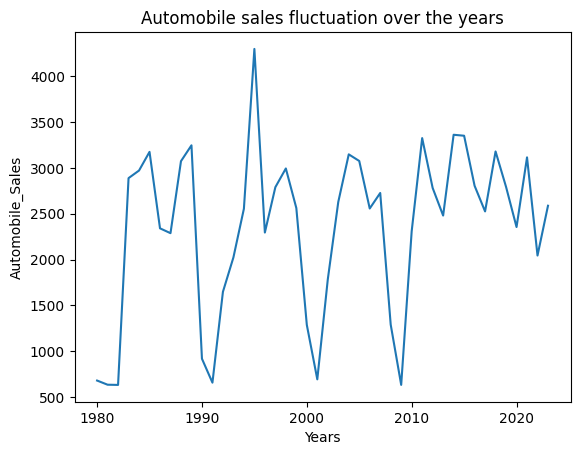

In [ ]:
df_line = df.groupby(df['Year'])['Automobile_Sales'].mean()
df_line.plot(x=df_line.index, y=df_line.values, kind = 'line')
plt.xlabel('Years')
plt.ylabel('Automobile_Sales')
plt.title('Automobile sales fluctuation over the years')
plt.show()

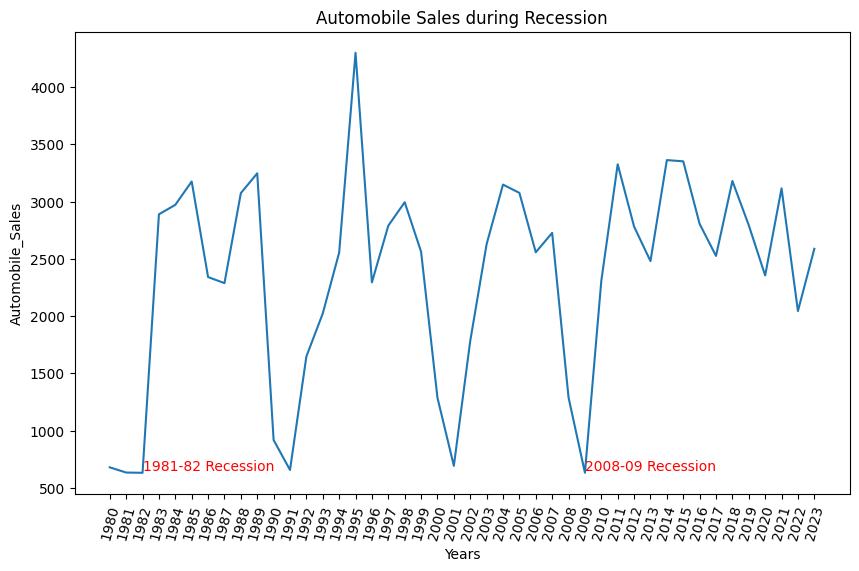

In [ ]:
plt.figure(figsize=(10, 6))
df_line = df.groupby(df['Year'])['Automobile_Sales'].mean()
df_line.plot(x=df_line.index, y=df_line.values, kind = 'line')
plt.xticks(list(range(1980,2024)), rotation = 75)
plt.xlabel('Years')
plt.ylabel('Automobile_Sales')
plt.title('Automobile Sales during Recession')
plt.text(1982, 650, '1981-82 Recession', color='red')
plt.text(2009, 650, '2008-09 Recession', color='red')
plt.show()

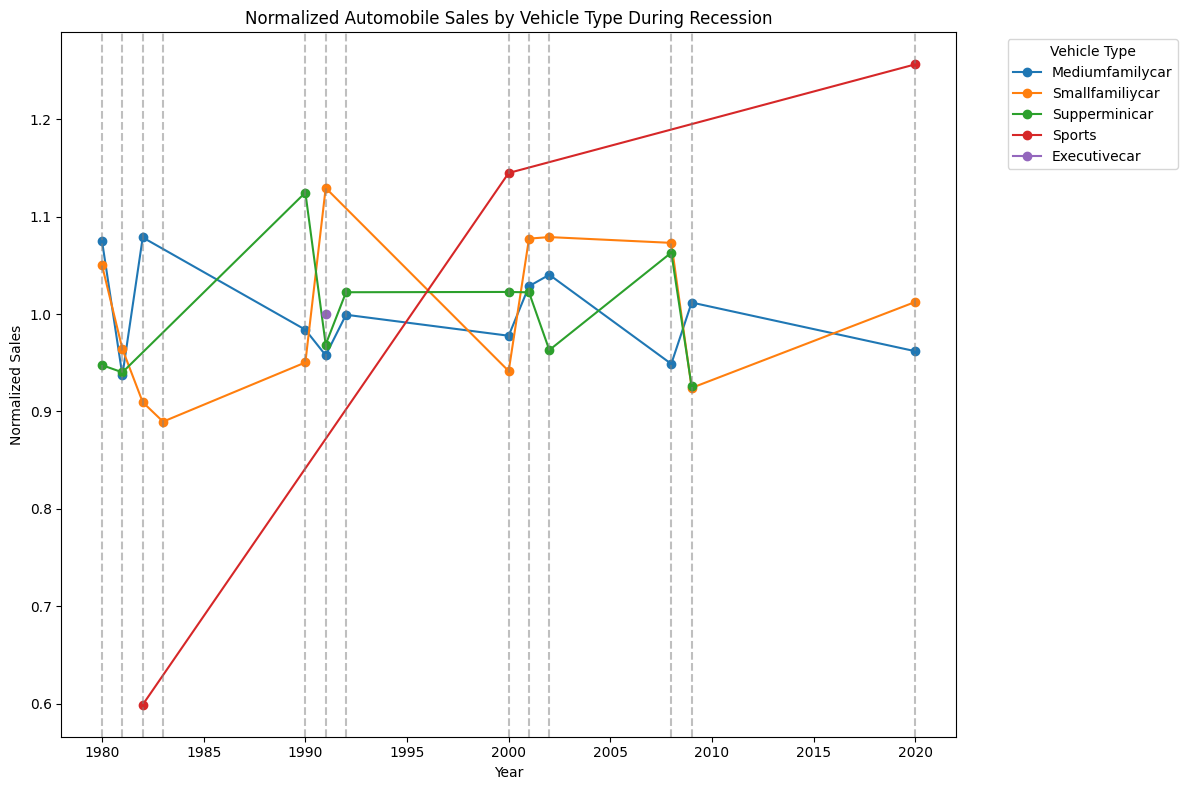

In [ ]:
df_rec = df[df['Recession'] == 1]

df_Mline = df_rec.groupby(['Year', 'Vehicle_Type'], as_index=False)['Automobile_Sales'].mean()

df_Mline['Normalized_Sales'] = df_Mline.groupby('Vehicle_Type')['Automobile_Sales'].transform(lambda x: x / x.mean())

df_Mline.set_index('Year', inplace=True)

plt.figure(figsize=(12, 8))
for vehicle_type in df_Mline['Vehicle_Type'].unique():
    data = df_Mline[df_Mline['Vehicle_Type'] == vehicle_type]
    plt.plot(data.index, data['Normalized_Sales'], label=vehicle_type, marker='o')

recession_years = df_rec['Year'].unique()
for year in recession_years:
    plt.axvline(x=year, color='gray', linestyle='--', alpha=0.5)

plt.legend(title="Vehicle Type", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.ylabel("Normalized Sales")
plt.xlabel("Year")
plt.title("Normalized Automobile Sales by Vehicle Type During Recession")

plt.tight_layout()
plt.show()


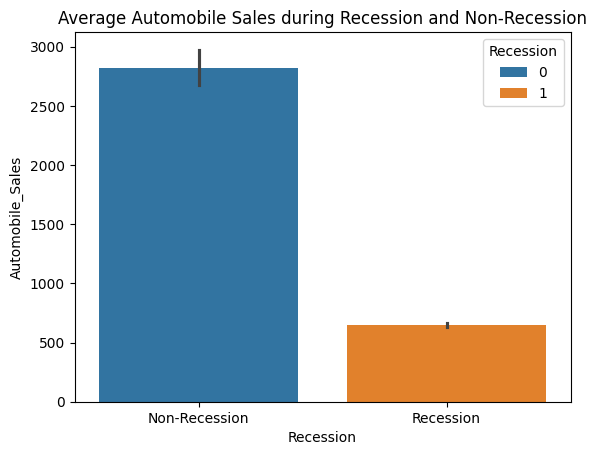

In [ ]:
new_df = df.groupby('Recession')['Automobile_Sales'].mean().reset_index()

sns.barplot(x='Recession', y='Automobile_Sales', hue='Recession',  data=df)
plt.xlabel('Recession')
plt.ylabel('Automobile_Sales')
plt.title('Average Automobile Sales during Recession and Non-Recession')
plt.xticks(ticks=[0, 1], labels=['Non-Recession', 'Recession'])
plt.show()

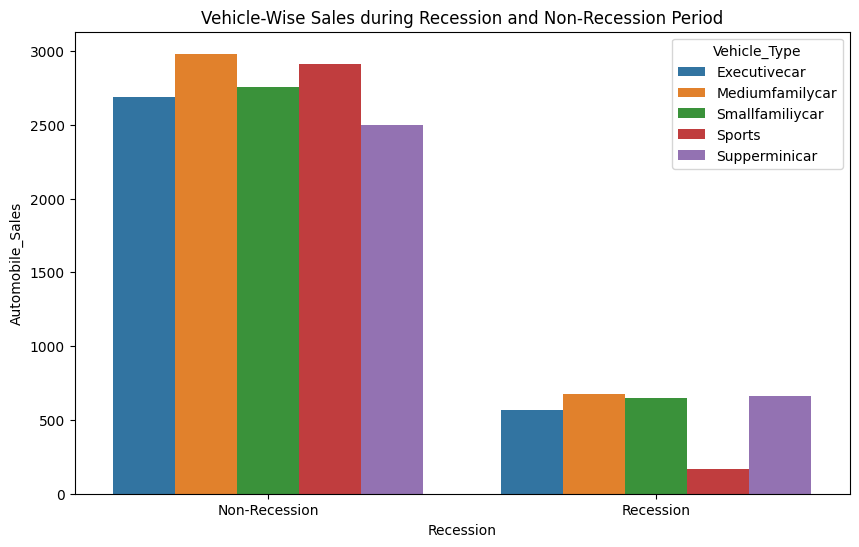

In [ ]:
grouped_df = df.groupby(['Recession', 'Vehicle_Type'])['Automobile_Sales'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='Recession', y='Automobile_Sales', hue='Vehicle_Type', data=grouped_df)
plt.xticks(ticks=[0, 1], labels=['Non-Recession', 'Recession'])
plt.xlabel('Recession')
plt.ylabel('Automobile_Sales')
plt.title('Vehicle-Wise Sales during Recession and Non-Recession Period')

plt.show()

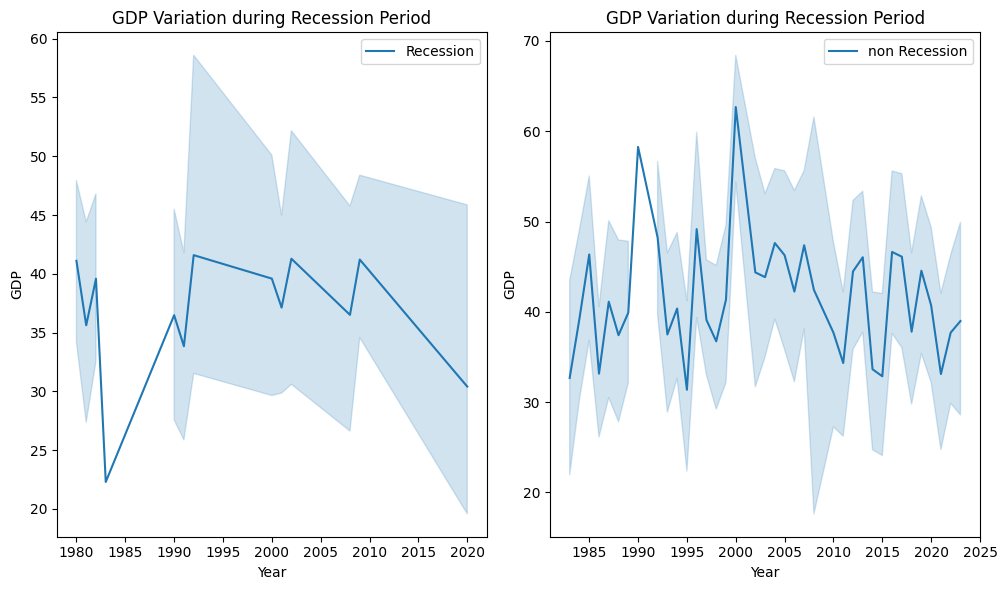

In [ ]:
plt.figure(figsize=(10, 6))
rec_data = df[df['Recession'] == 1]
non_rec_data = df[df['Recession'] == 0]
    #subplot 1
plt.subplot(1, 2, 1)
sns.lineplot(x='Year', y='GDP', data=rec_data, label='Recession')
plt.xlabel('Year')
plt.ylabel('GDP')
plt.title('GDP Variation during Recession Period')
    #subplot 1
plt.subplot(1, 2, 2)
sns.lineplot(x='Year', y='GDP', data=non_rec_data, label='non Recession')
plt.xlabel('Year')
plt.ylabel('GDP')
plt.title('GDP Variation during Recession Period')
plt.tight_layout()
plt.show()

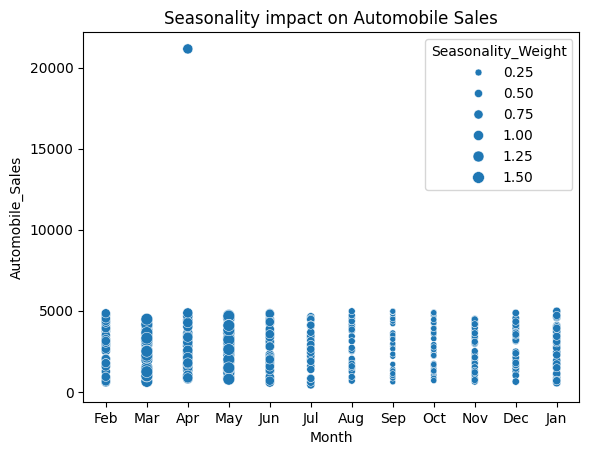

In [ ]:
size=non_rec_data['Seasonality_Weight'] #for bubble effect
sns.scatterplot(data=non_rec_data, x='Month', y='Automobile_Sales', size=size)
    #you can further include hue='Seasonality_Weight', legend=False)
plt.xlabel('Month')
plt.ylabel('Automobile_Sales')
plt.title('Seasonality impact on Automobile Sales')
plt.show()

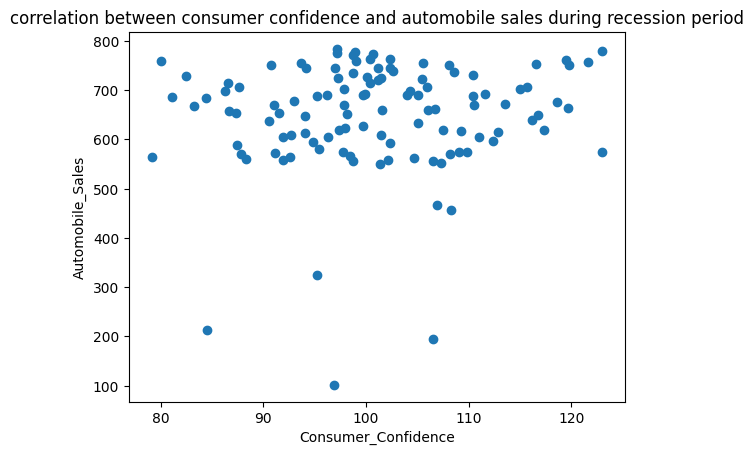

In [ ]:
plt.scatter(rec_data['Consumer_Confidence'], rec_data['Automobile_Sales'])
plt.xlabel('Consumer_Confidence')
plt.ylabel('Automobile_Sales')
plt.title('correlation between consumer confidence and automobile sales during recession period')
plt.show()

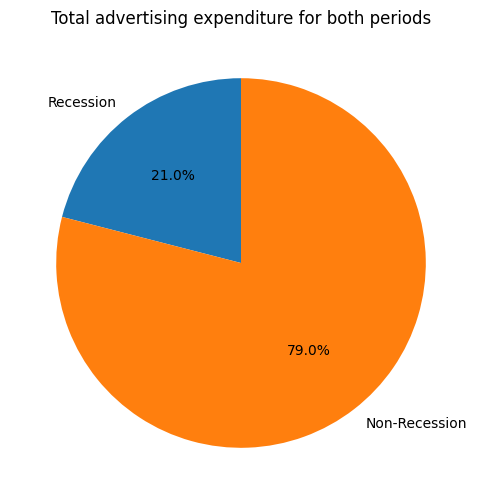

In [ ]:
RAtotal = rec_data['Advertising_Expenditure'].sum()
NRtotal = non_rec_data['Advertising_Expenditure'].sum()
plt.figure(figsize=(8, 6))
labels = ['Recession', 'Non-Recession']
sizes = [RAtotal, NRtotal]
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Total advertising expenditure for both periods')
plt.show()

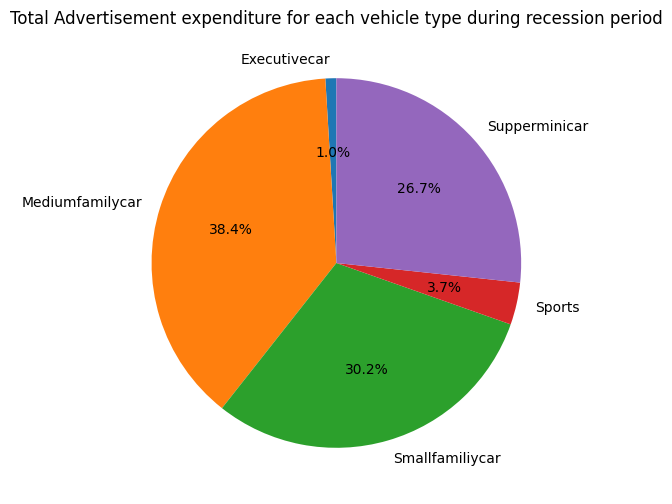

In [ ]:
VTexpenditure = rec_data.groupby('Vehicle_Type')['Advertising_Expenditure'].sum()
plt.figure(figsize=(8, 6))
labels = VTexpenditure.index
sizes = VTexpenditure.values
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Total Advertisement expenditure for each vehicle type during recession period')
plt.show()

/tmp/ipython-input-2126123993.py:1: UserWarning:


The markers list has fewer values (1) than needed (5) and will cycle, which may produce an uninterpretable plot.



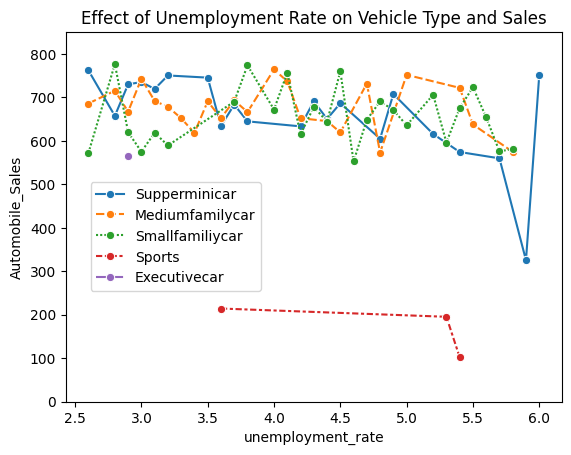

In [ ]:
sns.lineplot(data=rec_data, x='unemployment_rate', y='Automobile_Sales',
             hue='Vehicle_Type', style='Vehicle_Type', markers='o', err_style=None)
plt.ylim(0,850)
plt.legend(loc=(0.05,.3))
plt.title('Effect of Unemployment Rate on Vehicle Type and Sales')
plt.show()

In [ ]:
import requests

url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/us-states.json'
filename = "us-states.json"

try:
    response = requests.get(url)
    response.raise_for_status()  # Raise an exception for bad status codes (4xx or 5xx)
    with open(filename, "wb") as f:
        f.write(response.content)
    print(f"Downloaded {filename} successfully!")
except requests.exceptions.RequestException as e:
    print(f"Error downloading the file: {e}")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

Downloaded us-states.json successfully!


In [ ]:
sales_by_city = rec_data.groupby('City')['Automobile_Sales'].sum().reset_index()

    # Create a base map centered on the United States
map1 = folium.Map(location=[37.0902, -95.7129], zoom_start=4)

    # Create a choropleth layer using Folium
choropleth = folium.Choropleth(
        geo_data= 'us-states.json',  # GeoJSON file with state boundaries
        data=sales_by_city,
        columns=['City', 'Automobile_Sales'],
        key_on='feature.properties.name',
        fill_color='YlOrRd',
        fill_opacity=0.7,
        line_opacity=0.2,
        legend_name='Automobile Sales during Recession'
    ).add_to(map1)


    # Add tooltips to the choropleth layer
choropleth.geojson.add_child(
        folium.features.GeoJsonTooltip(['name'], labels=True)
    )

    # Display the map
map1

# ***Dashboard***

In [ ]:
app = dash.Dash(__name__)
app.config.suppress_callback_exceptions = True
year_list = [i for i in range(1980, 2024, 1)]
app.layout = html.Div(children=[ html.H1('Automobile Sales Statistics Dashboard',
                                style={'textAlign': 'center', 'color': '#503D36',
                                'font-size': 24}),
                                html.Div([
                                    html.Div(dcc.Dropdown(id='dropdown-statistics',
                                                       options=[
                                                             {'label': 'Yearly Statistics', 'value': 'Yearly Statistics'},
                                                             {'label': 'Recession Period Statistics', 'value': 'Recession Period Statistics'}],

                                                       placeholder='Select a report type',
                                                       value="Select Statistics",
                                                       style={"width": "80%",
                                                              "padding": "3px",
                                                              "fontSize": "20px",
                                                              "textAlignLast": "center"}), style={'display': 'flex'}),
                                    html.Div(dcc.Dropdown(id='select-year',
                                                       options=[{'label': i, 'value': i} for i in year_list],
                                                       placeholder='select-year',
                                                       value = 'select-year',
                                                       style={"width": "80%",
                                                              "padding": "3px",
                                                              "fontSize": "20px",
                                                              "textAlignLast": "center"}))
                                ]),
                                html.Div(id='output-container', className='chart-grid', style={'display': 'flex'})
])
@app.callback(
    Output(component_id='select-year', component_property='disabled'),
    Input(component_id='dropdown-statistics',component_property='value'))


def update_input_container(selected_stats):
    if selected_stats =='Yearly Statistics':
        return False
    else:
        return True



@app.callback(
    Output(component_id='output-container', component_property='children'),
    [Input(component_id='dropdown-statistics', component_property='value'), Input(component_id='select-year', component_property='value')])


def update_output_container(selected_stats, selected_year):
    if selected_stats == 'Recession Period Statistics':
        # data for recession periods
        recession_data = df[df['Recession'] == 1]

        #Plot 1 Automobile sales fluctuate over Recession Period (year wise) using line chart
        yearly_rec=recession_data.groupby('Year')['Automobile_Sales'].mean().reset_index()
        R_chart1 = dcc.Graph(
            figure=px.line(yearly_rec,
                x='Year',
                y='Automobile_Sales',
                title="Automobile sales fluctuate over Recession Period"))

#Plot 2 the average number of vehicles sold by vehicle type and represent as a Bar chart

        average_sales = recession_data.groupby('Vehicle_Type')['Automobile_Sales'].mean().reset_index()
        R_chart2  = dcc.Graph(
            figure=px.bar(average_sales,
            x='Vehicle_Type',
            y='Automobile_Sales',
            title="average number of vehicles sold by vehicle type"))

# Plot 3 : Pie chart for total expenditure share by vehicle type during recessions
        exp_rec= recession_data.groupby('Vehicle_Type')['Advertising_Expenditure'].sum().reset_index()
        R_chart3 = dcc.Graph(
                    figure=px.pie(exp_rec,
                    values='Advertising_Expenditure',
                    names='Vehicle_Type',
                    title="total expenditure share by vehicle type during recessions"
                )
        )

# Plot 4 Bar chart for the effect of unemployment rate on vehicle type and sales
        unemp_data= recession_data.groupby(['Vehicle_Type', 'unemployment_rate'])['Automobile_Sales'].mean().reset_index()
        R_chart4 = dcc.Graph(figure=px.bar(unemp_data,
        x='unemployment_rate',
        y='Automobile_Sales',
        color='Vehicle_Type',
        labels={'unemployment_rate': 'Unemployment Rate', 'Automobile_Sales': 'Average Automobile Sales'},
        title='Effect of Unemployment Rate on Vehicle Type and Sales'))


        return [
            html.Div(className='chart-item', children=[html.Div(children=R_chart1),html.Div(children=R_chart2)],style={'display': 'flex'}),
            html.Div(className='chart-item', children=[html.Div(children=R_chart2),html.Div(children=R_chart3)],style={'display': 'flex'})
            ]
    # Yearly Statistic Report Plots
     # Check for Yearly Statistics.
    elif (selected_year and selected_stats=='Yearly Statistics') :
        yearly_data = df[df['Year'] == selected_year]

# Plot 1 :Yearly Automobile sales using line chart for the whole period.

        yas= df.groupby('Year')['Automobile_Sales'].mean().reset_index()
        Y_chart1 = dcc.Graph(figure=px.line(yas,
                                            x='Year',
                                            y='Automobile_Sales',
                                            title="Yearly Automobile sales"))

# Plot 2 :Total Monthly Automobile sales using line chart.

        mas=df.groupby('Month')['Automobile_Sales'].mean().reset_index()
        Y_chart2 = dcc.Graph(figure=px.line(mas,
                                            x='Month',
                                            y='Automobile_Sales',
                                            title='Total Monthly Automobile Sales'))



# Plot3 bar chart for average number of vehicles sold during the given year
        avr_vdata=yearly_data.groupby('Vehicle_Type')['Automobile_Sales'].mean().reset_index()
        Y_chart3 = dcc.Graph(figure=px.bar(avr_vdata,
                                          x='Vehicle_Type',
                                          y='Automobile_Sales',
                                          title='Average Vehicles Sold by Vehicle Type in the year {}'.format(selected_year)))

# Plot 4 Total Advertisement Expenditure for each vehicle using pie chart

        exp_data=yearly_data.groupby('Vehicle_Type')['Advertising_Expenditure'].sum().reset_index()
        Y_chart4 = dcc.Graph(figure=px.pie(exp_data,
                              values='Advertising_Expenditure',
                              names='Vehicle_Type',
                              title='Total Advertisment Expenditure for Each Vehicle'))

        return [
                html.Div(className='chart-item', children=[html.Div(children=Y_chart1),html.Div(children=Y_chart2)],style={'display':'flex'}),
                html.Div(className='chart-item', children=[html.Div(children=Y_chart3),html.Div(children=Y_chart4)],style={'display': 'flex'})
                ]


if __name__ == '__main__':
    app.run()

<IPython.core.display.Javascript object>